# Problem statement: Visualizing Amazon Reviews

This notebook is focused on exploring Amazon product review data through various visualization techniques. The primary goal is to uncover insights from the data by examining the relationship between different variables

This exploration involves creating scatterplots, bar charts, box plots, line plots, pie charts, and word clouds to effectively analyze and interpret the data, thereby providing a comprehensive overview of consumer feedback on Amazon products.

The notebook contains one exercise in total:

* [Exercise 1](#ex_1)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon-product-review-data.csv to amazon-product-review-data (1).csv


In [ ]:
# Import necessary libraries
import pandas as pd

df = pd.read_csv('amazon-product-review-data.csv')

# Verify if the dataset is loaded correctly
print(df.head())

  market_place customer_id         review_id    product_id product_parent  \
0         "US"  "42521656"  "R26MV8D0KG6QI6"  "B000SAQCWC"    "159713740"   
1         "US"  "12049833"  "R1OF8GP57AQ1A0"  "B00509LVIQ"    "138680402"   
2         "US"    "107642"  "R3VDC1QB6MC4ZZ"  "B00KHXESLC"    "252021703"   
3         "US"   "6042304"  "R12FA3DCF8F9ER"  "B000F8JIIC"    "752728342"   
4         "US"  "18123821"   "RTWHVNV6X4CNJ"  "B004ZWR9RQ"    "552138758"   

                                       product_title product_category  \
0  "The Cravings Place Chocolate Chunk Cookie Mix...        "Grocery"   
1          "Mauna Loa Macadamias, 11 Ounce Packages"        "Grocery"   
2  "Organic Matcha Green Tea Powder - 100% Pure M...        "Grocery"   
3  "15oz Raspberry Lyons Designer Dessert Syrup S...        "Grocery"   
4  "Stride Spark Kinetic Fruit Sugar Free Gum, 14...        "Grocery"   

   star_rating  helpful_votes  total_votes     vine verified_purchase  \
0            1           

In [ ]:
# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   market_place       500 non-null    object
 1   customer_id        500 non-null    object
 2   review_id          500 non-null    object
 3   product_id         500 non-null    object
 4   product_parent     500 non-null    object
 5   product_title      500 non-null    object
 6   product_category   500 non-null    object
 7   star_rating        500 non-null    int64 
 8   helpful_votes      500 non-null    int64 
 9   total_votes        500 non-null    int64 
 10  vine               500 non-null    object
 11  verified_purchase  500 non-null    object
 12  review_headline    500 non-null    object
 13  review_body        500 non-null    object
 14  review_date        500 non-null    object
 15  sentiments         500 non-null    object
dtypes: int64(3), object(13)
memory usage: 62.6+ 

In [ ]:
# Calculate summary statistics for numerical columns
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)

       star_rating  helpful_votes  total_votes
count   500.000000     500.000000   500.000000
mean      0.796000       0.764000     1.068000
std       0.403373       2.843321     3.698477
min       0.000000       0.000000     0.000000
25%       1.000000       0.000000     0.000000
50%       1.000000       0.000000     0.000000
75%       1.000000       1.000000     1.000000
max       1.000000      36.000000    47.000000


In [ ]:
# Explore categorical variables
categorical_columns = ['market_place', 'product_category', 'sentiments']

for column in categorical_columns:
    category_counts = df[column].value_counts()
    print(f"Category counts for {column}:\n{category_counts}\n")

Category counts for market_place:
"US"    500
Name: market_place, dtype: int64

Category counts for product_category:
"Grocery"                   100
"Digital_Ebook_Purchase"    100
"Jewelry"                   100
"PC"                        100
"Books"                     100
Name: product_category, dtype: int64

Category counts for sentiments:
positive    398
negative    102
Name: sentiments, dtype: int64



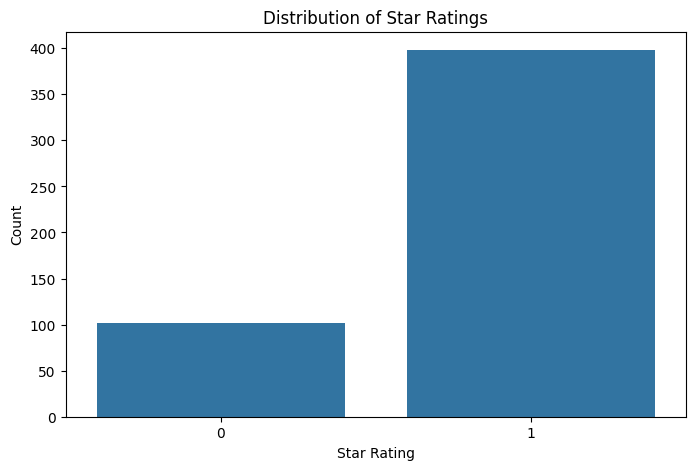

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for star ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='star_rating')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

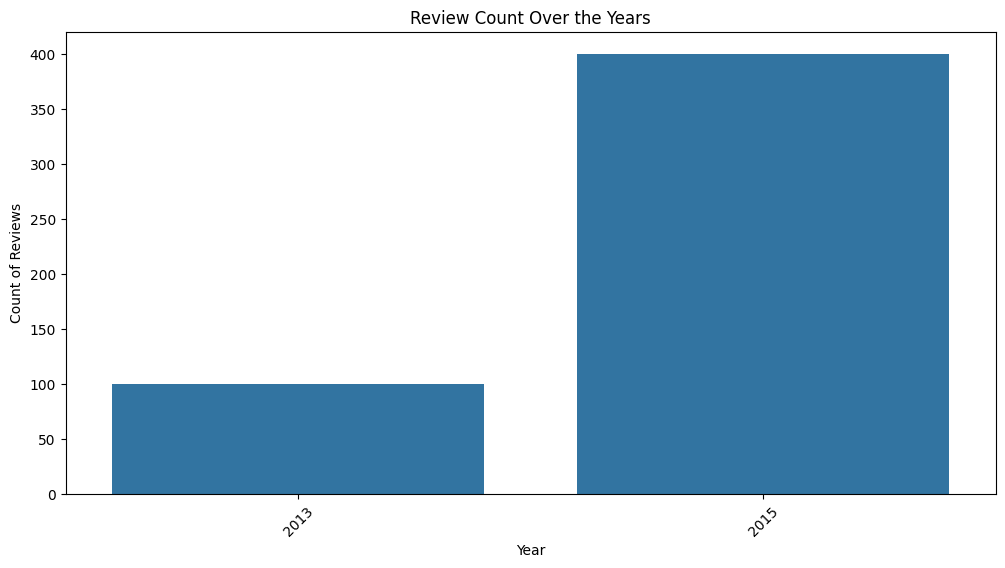

In [ ]:
# Convert the 'review_date' column to a datetime format
df['review_date'] = pd.to_datetime(df['review_date'])

# Extract year and month from the 'review_date' column
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.strftime('%B')
df['review_day'] = df['review_date'].dt.strftime('%A')

# Plot the count of reviews over the years
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='review_year')
plt.title('Review Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.show()

count     500.000000
mean      243.754000
std       474.800472
min         6.000000
25%        40.000000
50%       109.000000
75%       247.250000
max      5868.000000
Name: review_body_length, dtype: float64


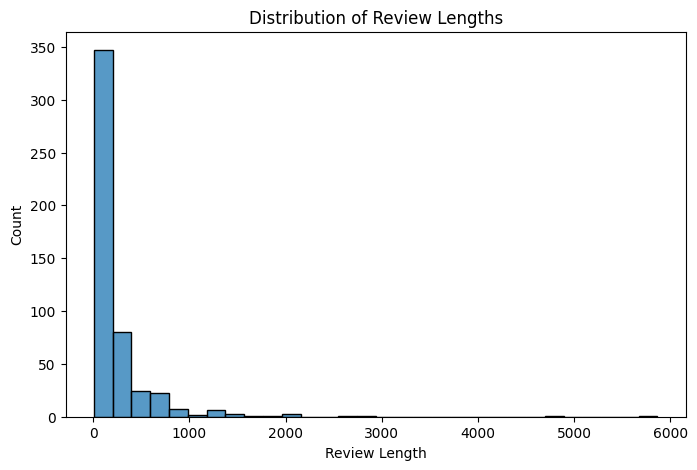

In [ ]:
# Calculate the length of each review
df['review_body_length'] = df['review_body'].apply(len)

# Calculate descriptive statistics for review length
review_length_stats = df['review_body_length'].describe()

# Print the review length statistics
print(review_length_stats)

# Create a histogram for review lengths
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='review_body_length', bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

<ipython-input-9-3137580b5117>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


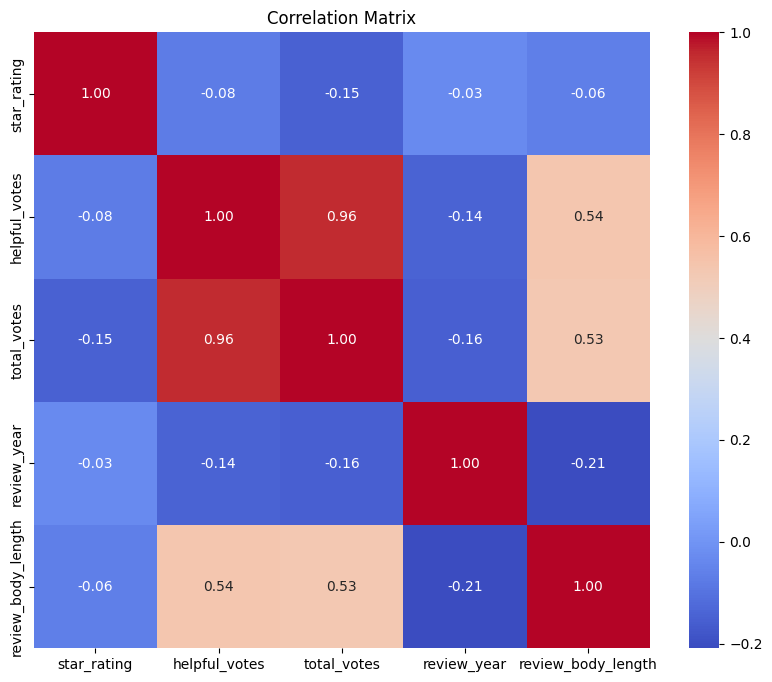

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

<a name="ex_1"></a>
# Exercise 1

**Tasks:**

- Create a scatterplot to visualize the relationship between star ratings and review length
- Create a bar chart to visualize the average star rating for each product category
- Create a box plot to visualize the distribution of star ratings for each product category
- Create a line plot to visualize the trend of star ratings over time
- Create a pie chart to visualize the distribution of sentiments
- Create a word cloud to visualize the most common words in the reviews

In [ ]:
#  #   Column             Non-Null Count  Dtype
# ---  ------             --------------  -----
#  0   market_place       500 non-null    object
#  1   customer_id        500 non-null    object
#  2   review_id          500 non-null    object
#  3   product_id         500 non-null    object
#  4   product_parent     500 non-null    object
#  5   product_title      500 non-null    object
#  6   product_category   500 non-null    object
#  7   star_rating        500 non-null    int64
#  8   helpful_votes      500 non-null    int64
#  9   total_votes        500 non-null    int64
#  10  vine               500 non-null    object
#  11  verified_purchase  500 non-null    object
#  12  review_headline    500 non-null    object
#  13  review_body        500 non-null    object
#  14  review_date        500 non-null    object
#  15  sentiments         500 non-null    object
# Write your code here
df['review_body_length'] = df['review_body'].apply(len)

plt.scatter(data=df, x='star_rating', color='g')
plt.scatter(data=df, y='review_body_length', color='y')
plt.title(' relationship between star ratings and review length')
plt.show()

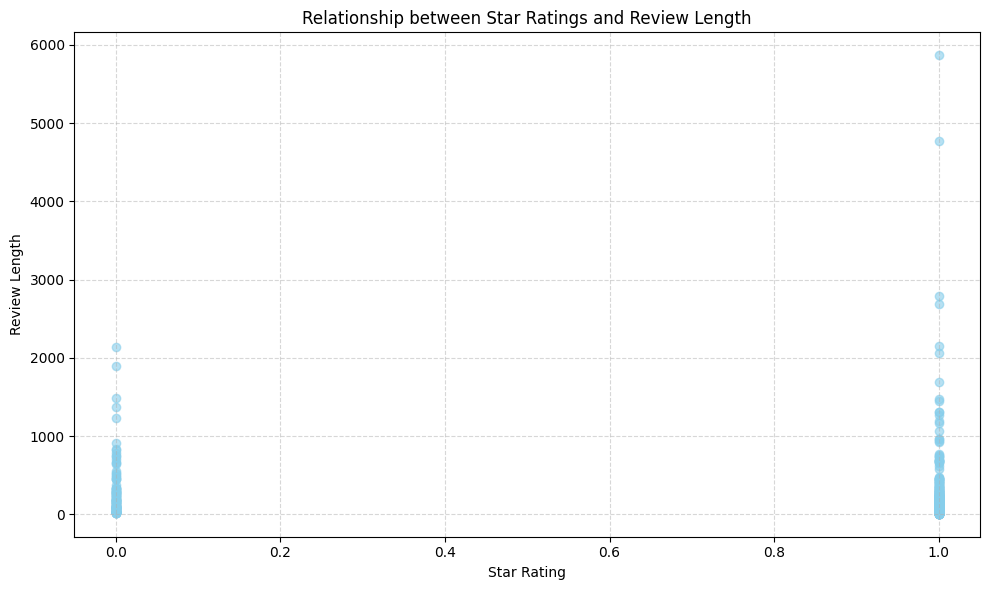

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with columns as described

# Calculate the length of each review
df['review_length'] = df['review_body'].apply(len)

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['star_rating'], df['review_length'], color='skyblue', alpha=0.6)
plt.title('Relationship between Star Ratings and Review Length')
plt.xlabel('Star Rating')
plt.ylabel('Review Length')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

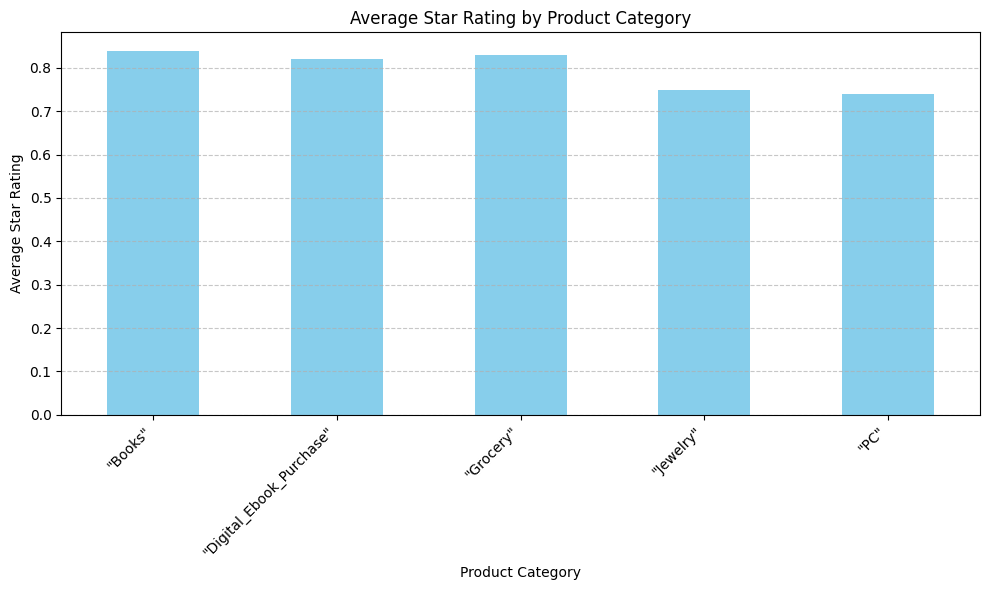

In [ ]:
# - Create a bar chart to visualize the average star rating for each product category
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with columns 'product_category' and 'star_rating'
# Calculate average star rating for each product category
average_ratings = df.groupby('product_category')['star_rating'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
average_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Star Rating by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

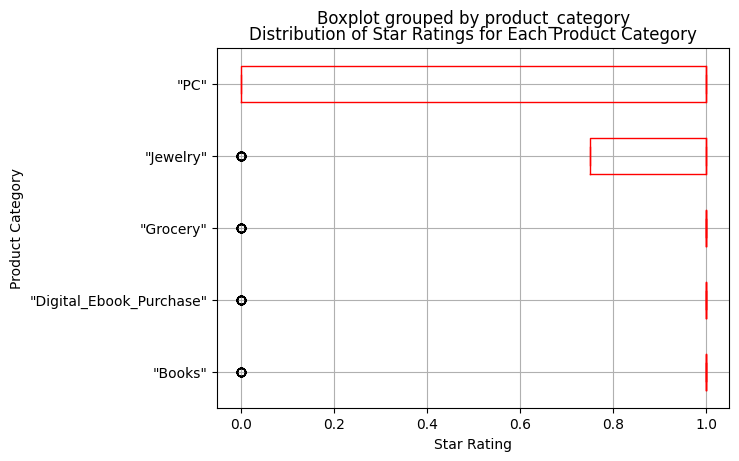

In [ ]:
# # - Create a box plot to visualize the distribution of star ratings for each product category
# # - Create a bar chart to visualize the average star rating for each product category
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame df with columns 'product_category' and 'star_rating'
# # Calculate average star rating for each product category
# distribution = df.groupby('product_category')['star_rating'].summary()

# # Plotting the bar chart
# plt.figure(figsize=(10, 6))
# distribution.plot(kind='bar', color='skyblue')
# plt.title('distribution of star ratings for each product category')
# plt.xlabel('Product Category')
# plt.ylabel('distribution Star Rating')
# plt.xticks(rotation=45, ha='right')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()
import matplotlib.pyplot as plt

# Plotting the box plot
plt.figure(figsize=(10, 6))

df.boxplot(column='star_rating', by='product_category', vert=False,  color='red')
plt.title('Distribution of Star Ratings for Each Product Category')
plt.xlabel('Star Rating')
plt.ylabel('Product Category')
plt.show()


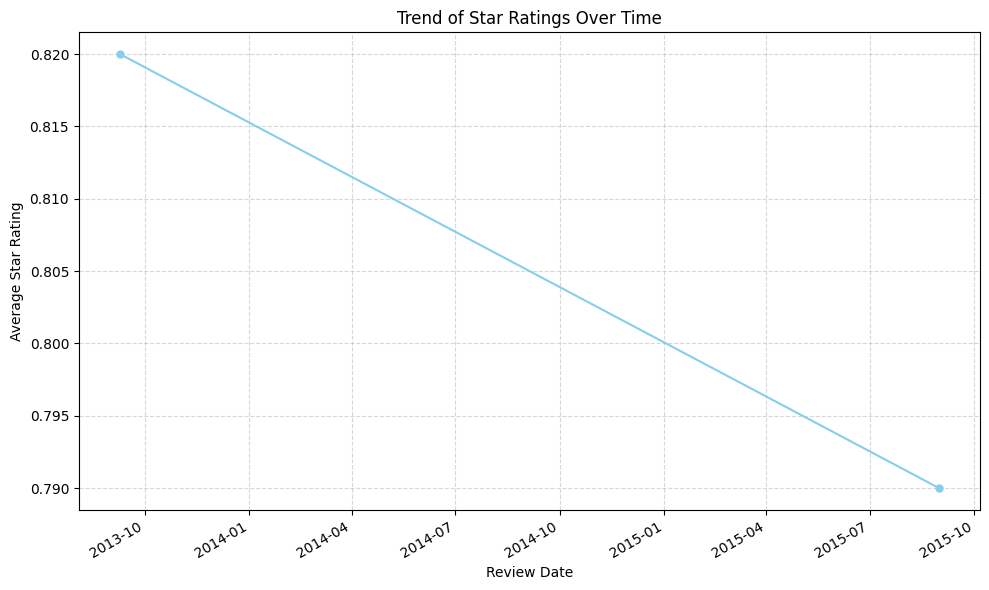

In [ ]:
# Create a line plot to visualize the trend of star ratings over time
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with columns 'review_date' and 'star_rating'

# Convert 'review_date' column to datetime format
df['review_date'] = pd.to_datetime(df['review_date'])

# Group by 'review_date' and calculate the mean star rating for each date
star_rating_trend = df.groupby('review_date')['star_rating'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
star_rating_trend.plot(color='skyblue', marker='o', markersize=5, linestyle='-')
plt.title('Trend of Star Ratings Over Time')
plt.xlabel('Review Date')
plt.ylabel('Average Star Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


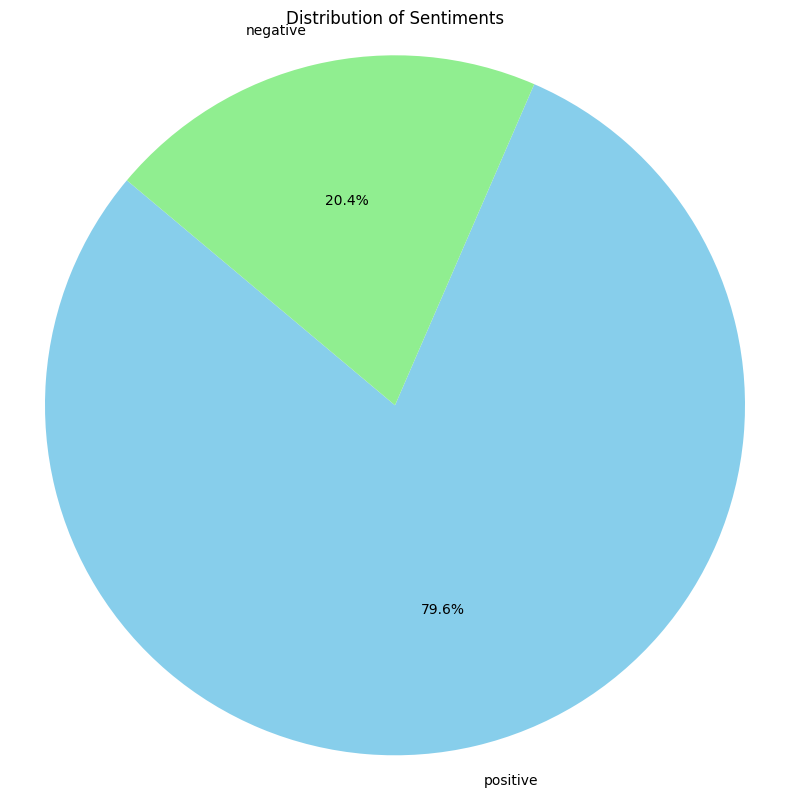

In [ ]:
# Create a pie chart to visualize the distribution of sentiments
import matplotlib.pyplot as plt
# Assuming you have a DataFrame df with a column 'sentiments' representing sentiments
# Count the occurrences of each sentiment category
sentiment_counts = df['sentiments'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


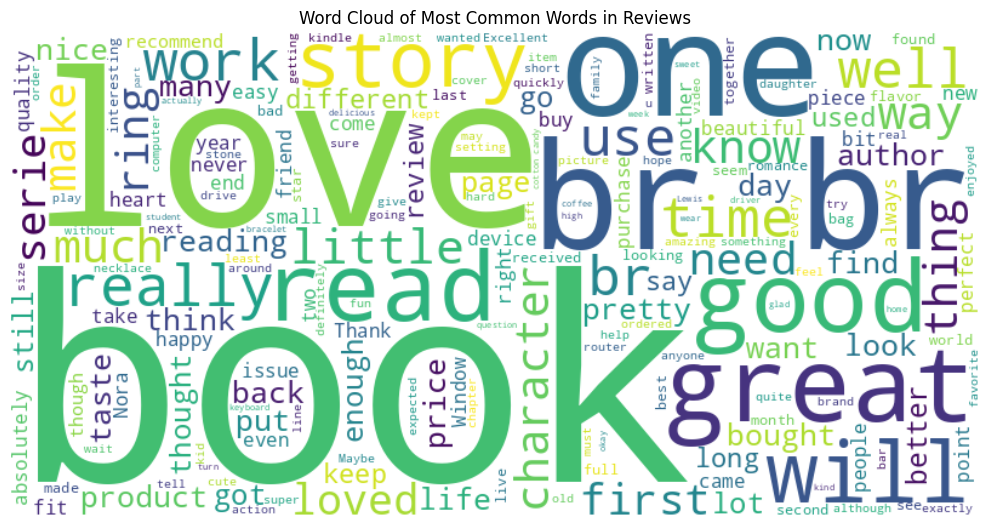

In [ ]:
# Create a word cloud to visualize the most common words in the reviews
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with a column 'review_body' containing the reviews

# Concatenate all review texts into a single string
all_reviews_text = ' '.join(review for review in df['review_body'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Common Words in Reviews')
plt.axis('off')  # Turn off axis
plt.show()
